# Importing libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as SM

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score
)

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingRegressor,
)
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [8]:
# Load the datasets
travel_data = pd.read_csv("/content/Traveldata_train_(1)_(3).csv")
survey_data = pd.read_csv("/content/Surveydata_train_(1)_(2)_(1).csv")

# Check the first few rows
print(travel_data.head())
print(travel_data.shape)

         ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  
0              272                     0.0                   5.0  
1             2200                     9.0                   0.0  
2             1061                    77.0                 119.0  
3              780                    13.0                  18.0  
4             1981                     0.0                   0.0  
(94379, 9)


In [ ]:
print(survey_data.head())
print(survey_data.shape)

         ID  Overall_Experience      Seat_comfort Seat_Class  \
0  98800001                   0  need improvement  Green Car   
1  98800002                   0              poor   Ordinary   
2  98800003                   1  need improvement  Green Car   
3  98800004                   0        acceptable   Ordinary   
4  98800005                   1        acceptable   Ordinary   

  Arrival_time_convenient          Catering Platform_location  \
0               excellent         excellent   very convinient   
1               excellent              poor  need improvement   
2        need improvement  need improvement  need improvement   
3        need improvement               NaN  need improvement   
4              acceptable        acceptable        manageable   

  Onboardwifi_service Onboard_entertainment Online_support Onlinebooking_Ease  \
0                good      need improvement     acceptable   need improvement   
1                good                  poor           good    

## Merging two files

In [9]:
df = pd.merge(travel_data, survey_data, on="ID", how="inner")

In [ ]:
travel_data.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [ ]:
survey_data.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [ ]:
df.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [ ]:
df.shape

(94379, 25)

# Understanding the dataset

In [ ]:
df.shape

(94379, 25)

In [ ]:
df.head(3)

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   CustomerType             85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   TypeTravel               85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   DepartureDelay_in_Mins   94322 non-null  float64
 8   ArrivalDelay_in_Mins     94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_time_convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_location     

- **`Rows - 94379`, `Columns - 25`**
- **Float (3)** - `ArrivalDelay_in_Mins`, `DepartureDelay_in_Mins`, `Age`
- **Integer (3)** - `Overall_Experience`, `Travel_Distance`, `ID`

**These can be converted into float before we train the model**

- Female travelers are more.
- Loyal customers make upto 70% of the data.
- Around 60% is for business travel.
- Most of these travels use economy.
- Around 50% of data composed of age group less 40 and nect 25% is less than 51.
- Travel distance of customers 50Km will make up 25%, ~1400Km make up 50%, ~2500Km makes up 75%.



In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerType,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
TypeTravel,85153,2,Business travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,77
CustomerType,8951
Age,33
TypeTravel,9226
Travel_Class,0
Travel_Distance,0
DepartureDelay_in_Mins,57
ArrivalDelay_in_Mins,357
Overall_Experience,0


In [ ]:
9226/94379*100

9.775479714767057

In [ ]:
df['CustomerType'].value_counts(1)*100

,proportion
CustomerType,
Loyal Customer,81.733155
disloyal Customer,18.266845


In [ ]:
df['Gender'].value_counts(1)*100

,proportion
Gender,
Female,50.704121
Male,49.295879


In [ ]:
df['TypeTravel'].value_counts(1)*100

,proportion
TypeTravel,
Business travel,68.837269
Personal Travel,31.162731


In [ ]:
df['Travel_Class'].value_counts(1)*100

,proportion
Travel_Class,
Eco,52.280698
Business,47.719302


In [ ]:
df['Seat_comfort'].value_counts(1)*100

,proportion
Seat_comfort,
acceptable,22.432622
need improvement,22.207850
good,21.835705
poor,16.099790
excellent,13.752412
extremely poor,3.671622


In [ ]:
temp['Overall_Experience'] = df["Overall_Experience"].astype(str)

temp['Overall_Experience'].value_counts(1)*100

,proportion
Overall_Experience,
1,54.665763
0,45.334237


In [ ]:
df['Seat_comfort'].value_counts(1)*100

,proportion
Seat_comfort,
acceptable,22.432622
need improvement,22.207850
good,21.835705
poor,16.099790
excellent,13.752412
extremely poor,3.671622


In [ ]:
df['Seat_Class'].value_counts(1)*100

,proportion
Seat_Class,
Green Car,50.260121
Ordinary,49.739879


In [ ]:
df['Arrival_time_convenient'].value_counts(1)*100

,proportion
Arrival_time_convenient,
good,22.907231
excellent,20.695386
acceptable,17.761472
need improvement,17.542628
poor,16.023593
extremely poor,5.069691


## Treating Missing Values

In [ ]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage.sort_values(ascending=False))

TypeTravel                 9.775480
CustomerType               9.484101
Arrival_time_convenient    9.461851
Catering                   9.261594
Onboard_service            8.053698
ArrivalDelay_in_Mins       0.378262
Baggage_handling           0.150457
Online_support             0.096420
Leg_room                   0.095360
Checkin_service            0.081586
Gender                     0.081586
Onlinebooking_Ease         0.077348
Seat_comfort               0.064633
DepartureDelay_in_Mins     0.060395
Age                        0.034965
Platform_location          0.031787
Onboardwifi_service        0.031787
Onboard_entertainment      0.019072
Cleanliness                0.006357
Online_boarding            0.006357
Seat_Class                 0.000000
Overall_Experience         0.000000
Travel_Distance            0.000000
Travel_Class               0.000000
ID                         0.000000
dtype: float64


**Simply dropping the values which are null**

In [10]:
df_dropped_nan = df.dropna()

In [ ]:
df_dropped_nan.isnull().sum().sum()

0

# Visualization

In [ ]:
def plot_categorical_subplots(df, cols=None):
    """
    Plots bar charts for categorical columns in a dataset as subplots.

    Parameters:
    df : pandas DataFrame
        The dataset containing categorical columns.
    cols : list, optional
        List of categorical columns to plot. If None, it automatically detects categorical columns.
    """
    # Detect categorical columns if not provided
    if cols is None:
        cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    num_cols = len(cols)  # Number of categorical columns

    # Determine subplot grid size
    rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 per row
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))  # Adjust figure size dynamically
    axes = axes.flatten()  # Flatten for easy iteration

    for i, col in enumerate(cols):
        ax = axes[i]

        # Get value counts as percentages
        value_counts = df[col].value_counts(normalize=True) * 100

        # Create bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="viridis")

        # Annotate percentages on bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=12, color='black')

        ax.set_title(f'Distribution of {col}', fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


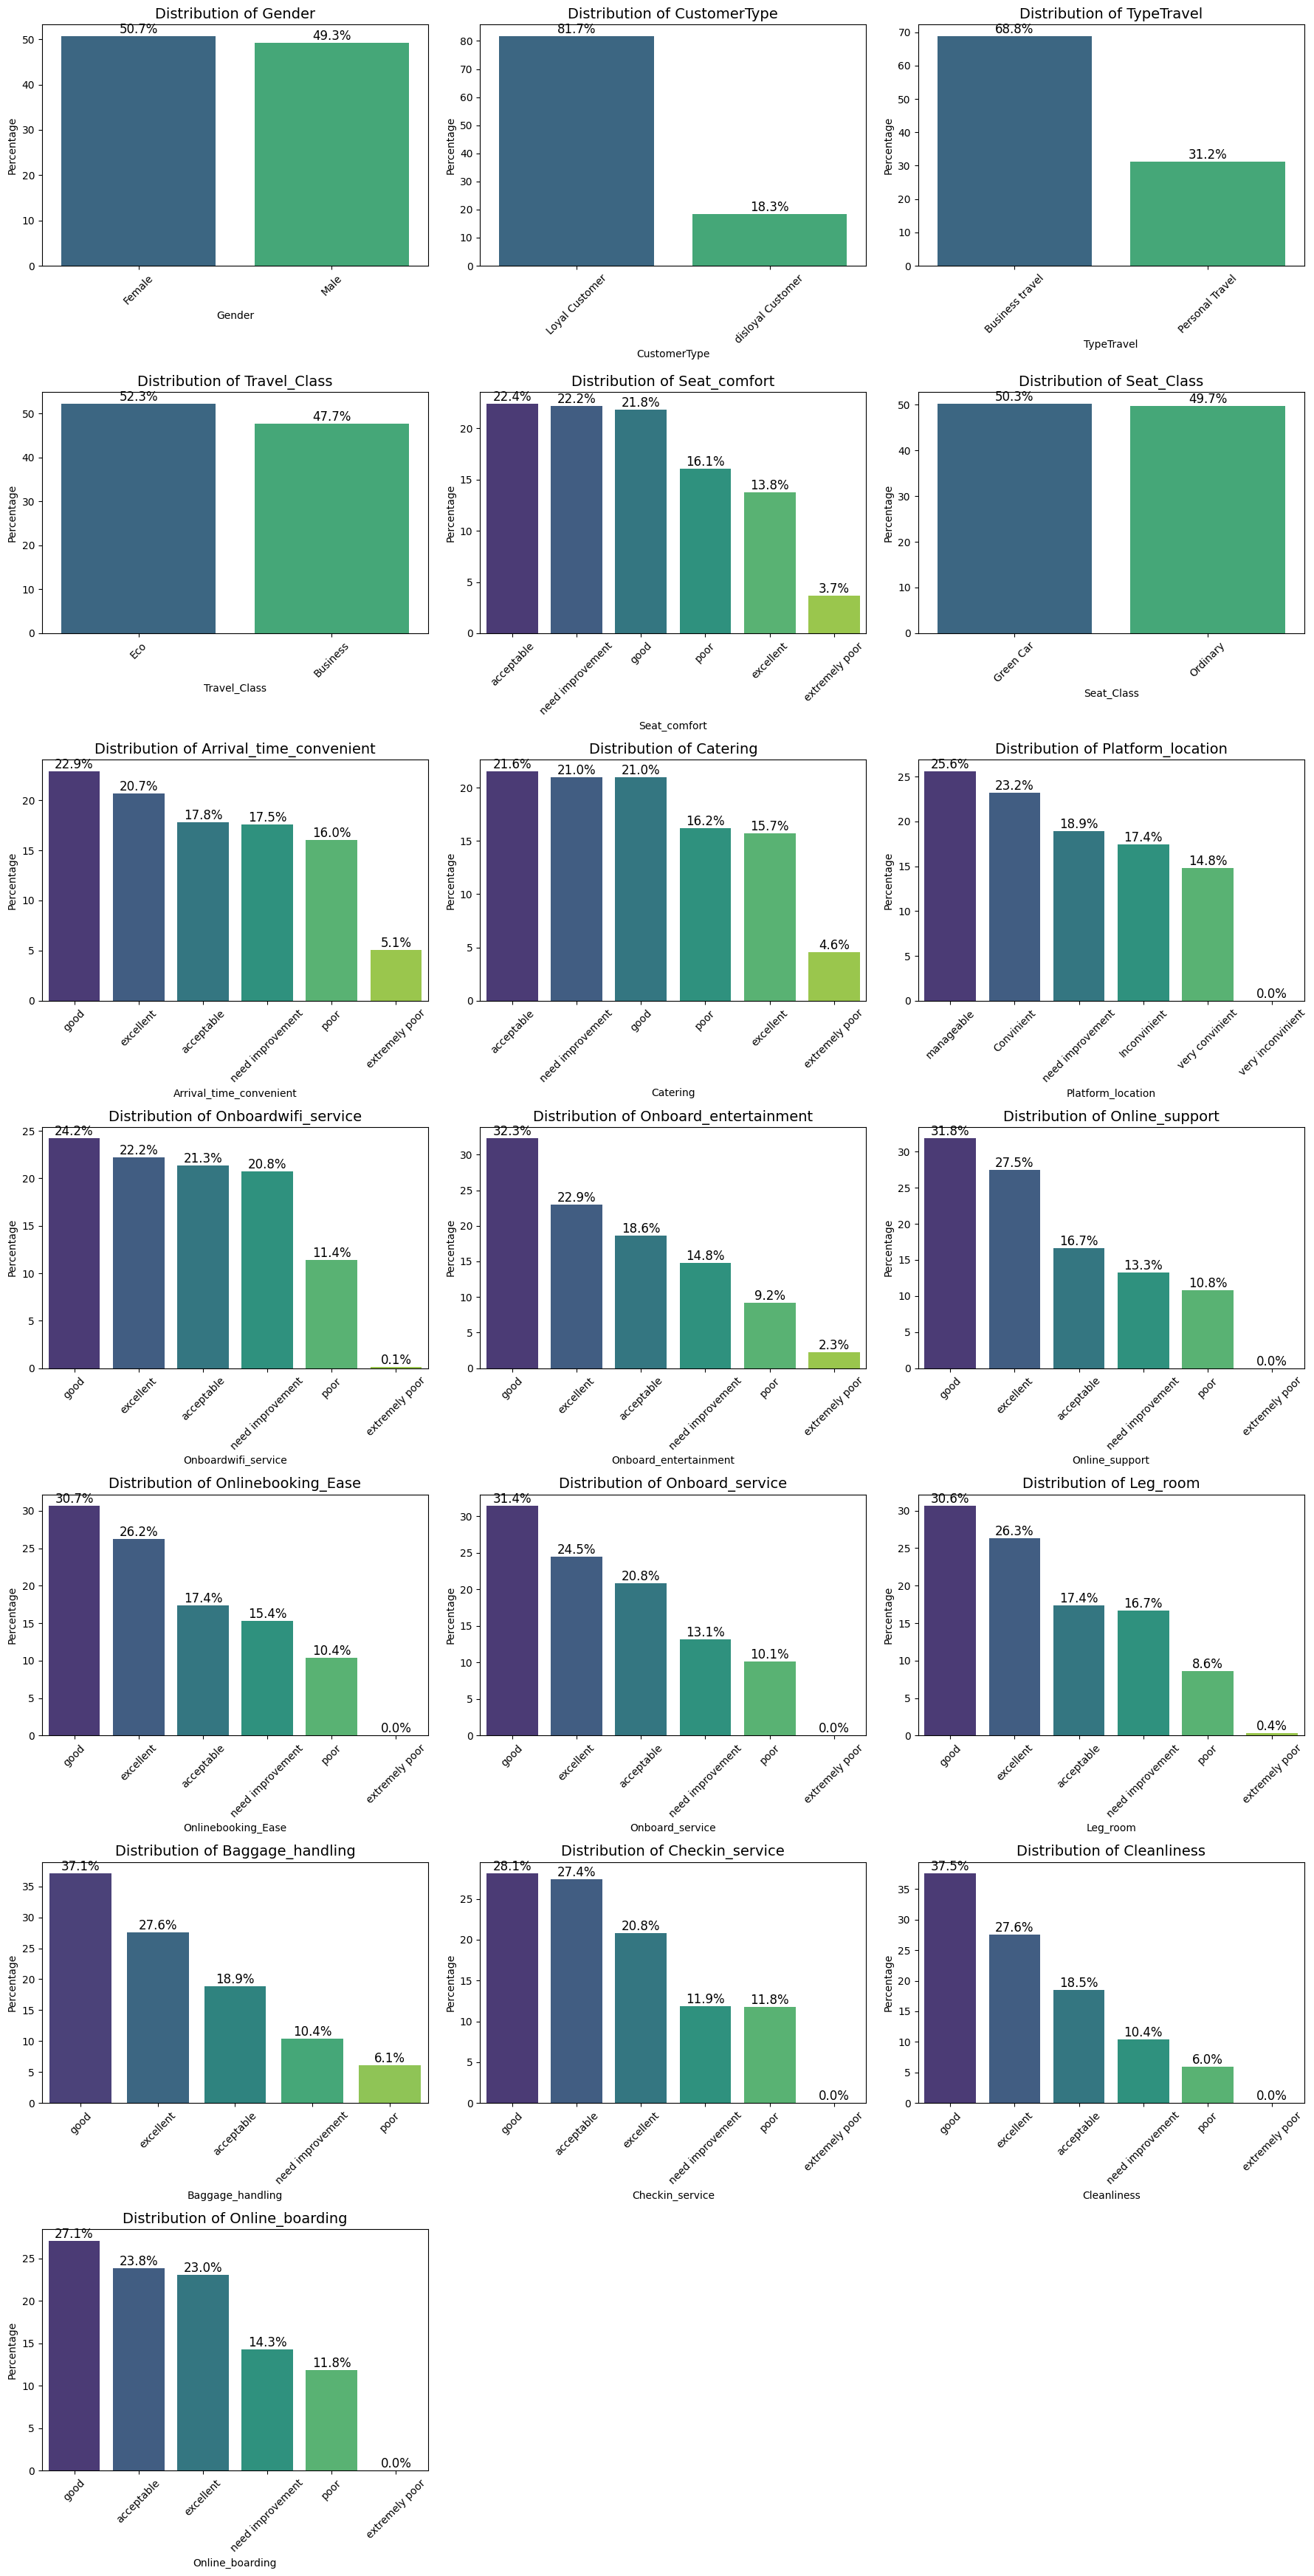

In [ ]:
plot_categorical_subplots(df)

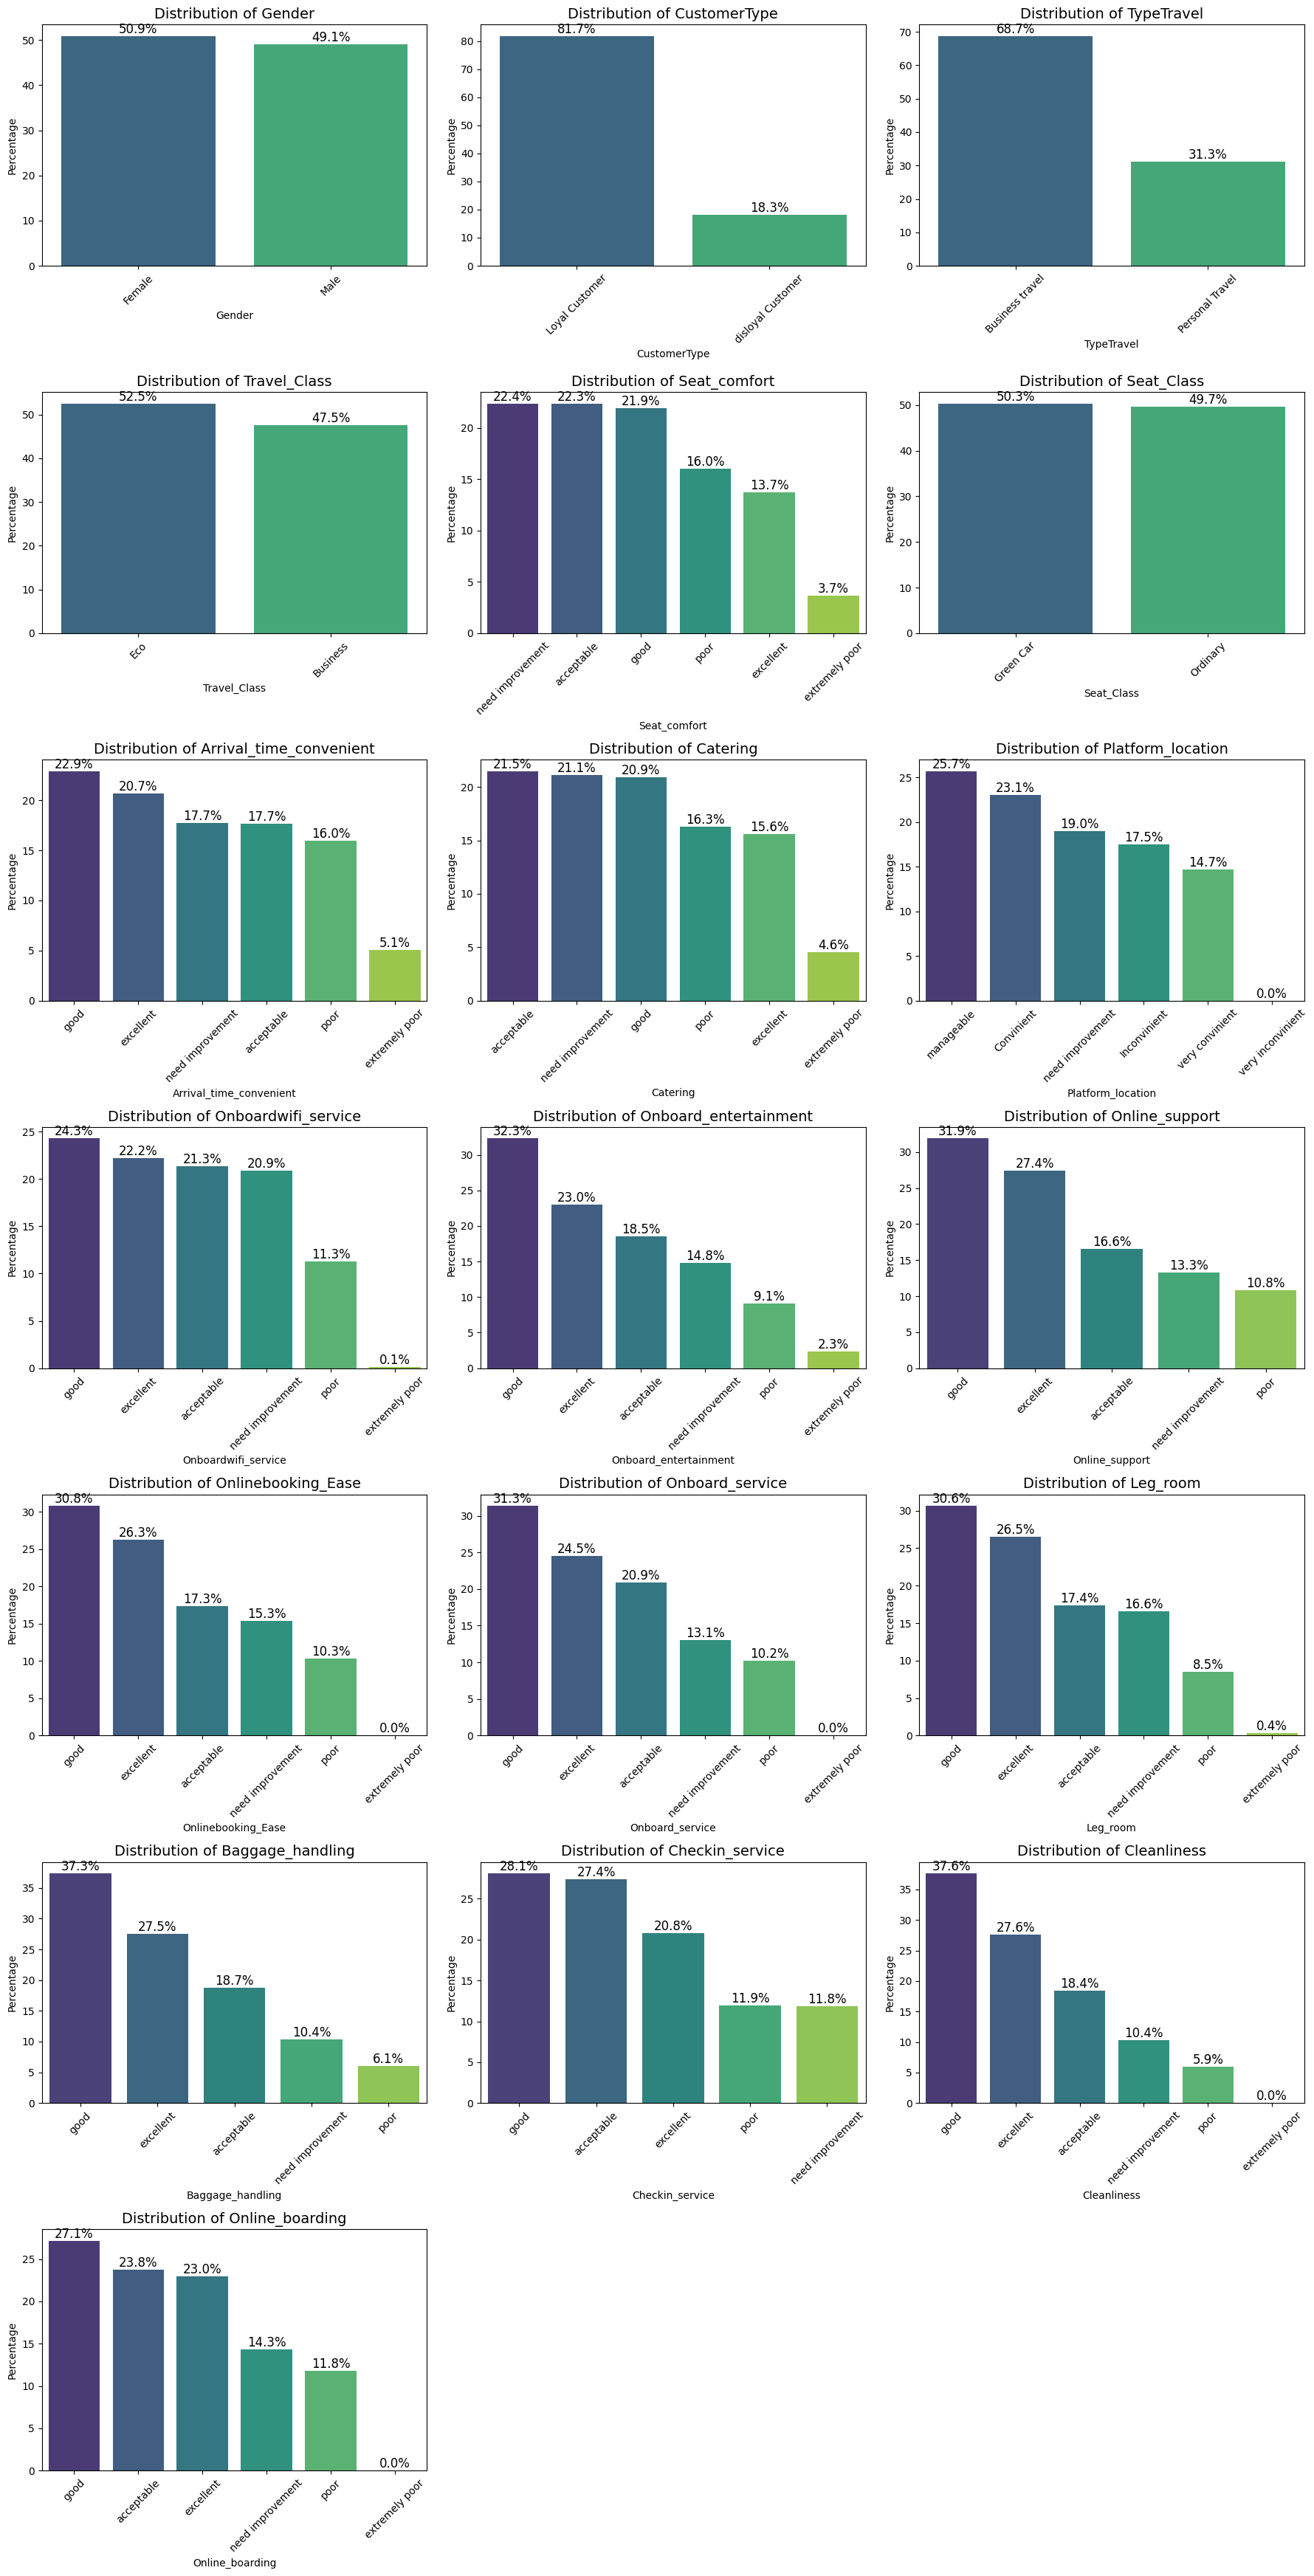

In [ ]:
plot_categorical_subplots(df_dropped_nan)

In [ ]:
def plot_numerical_subplots(df, cols=None):
    """
    Plots histograms and boxplots for numerical columns in a dataset as subplots.

    Parameters:
    df : pandas DataFrame
        The dataset containing numerical columns.
    cols : list, optional
        List of numerical columns to plot. If None, it automatically detects numerical columns.
    """
    # Detect numerical columns if not provided
    if cols is None:
        cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    num_cols = len(cols)  # Number of numerical columns

    # Create subplots: 2 rows per feature (Histogram + Boxplot)
    fig, axes = plt.subplots(num_cols, 2, figsize=(10, 2 * num_cols))

    for i, col in enumerate(cols):
        # Histogram
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 0], color='royalblue')
        axes[i, 0].set_title(f'Histogram of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Count')

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[i, 1], color='orange')
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


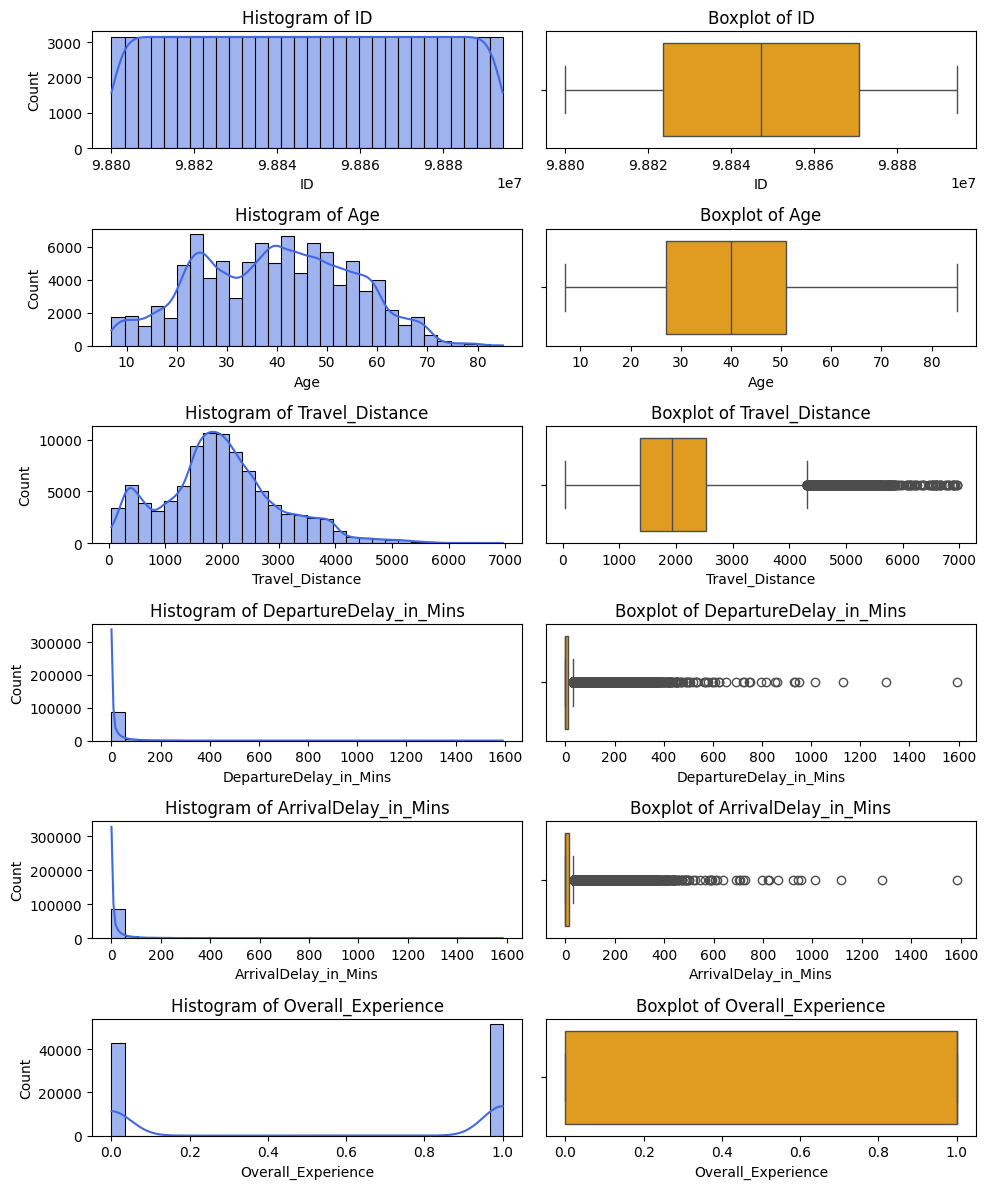

In [ ]:
plot_numerical_subplots(df)

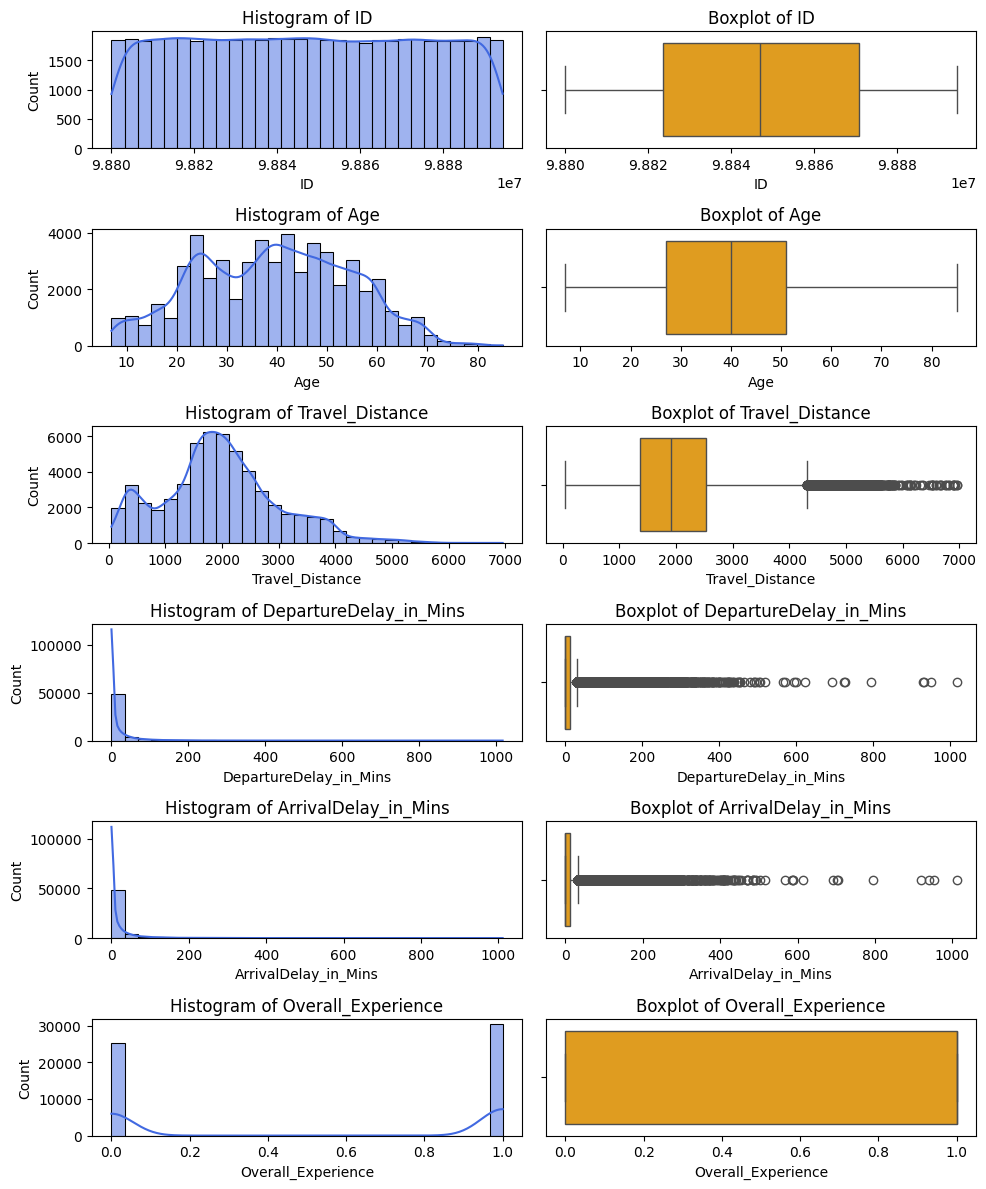

In [ ]:
plot_numerical_subplots(df_dropped_nan)

### NOTE
**After looking at the distribution of the data, we can consider dropping the null values as they almost never affect the over all data distribution.**

# Data Prepration for Training

In [11]:
df_for_model = df_dropped_nan.drop("ID", axis=1)

In [12]:
df_for_model = pd.get_dummies(
    df_for_model,
    columns = df_for_model.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first = True,
)

df_for_model = df_for_model.astype(float)

In [9]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55503 entries, 1 to 94375
Data columns (total 77 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       55503 non-null  float64
 1   Travel_Distance                           55503 non-null  float64
 2   DepartureDelay_in_Mins                    55503 non-null  float64
 3   ArrivalDelay_in_Mins                      55503 non-null  float64
 4   Overall_Experience                        55503 non-null  float64
 5   Gender_Male                               55503 non-null  float64
 6   CustomerType_disloyal Customer            55503 non-null  float64
 7   TypeTravel_Personal Travel                55503 non-null  float64
 8   Travel_Class_Eco                          55503 non-null  float64
 9   Seat_comfort_excellent                    55503 non-null  float64
 10  Seat_comfort_extremely poor            

In [13]:
X = df_for_model.drop("Overall_Experience", axis = 1)
y = df_for_model['Overall_Experience']

In [14]:
print(X.shape, " ", y.shape)

(55503, 76)   (55503,)


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 1, shuffle = True)

In [16]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((38852, 76), (16651, 76), (38852,), (16651,))

# Model Training

## Model evaluation criterion

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree

In [26]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

In [27]:
dt_pred = dtree.predict(X_val)

In [28]:
accuracy = accuracy_score(y_val, dt_pred)
precision = precision_score(y_val, dt_pred)
recall = recall_score(y_val, dt_pred)
f1 = f1_score(y_val, dt_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.94
F1-Score: 0.94


In [31]:
scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.9356513603716785


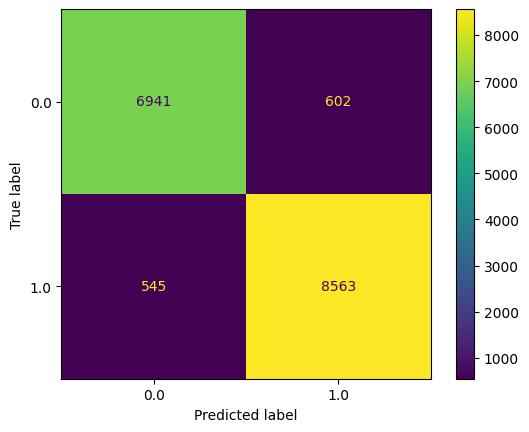

In [34]:
ConfusionMatrixDisplay.from_estimator(dtree, X_val, y_val)
plt.show()

## RandomForest

In [37]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

In [38]:
accuracy = accuracy_score(y_val, rf_preds)
precision = precision_score(y_val, rf_preds)
recall = recall_score(y_val, rf_preds)
f1 = f1_score(y_val, rf_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1-Score: 0.95


In [39]:
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print("Cross-validated F1 Score for Decision Tree:", scores.mean())

Cross-validated F1 Score for Decision Tree: 0.9514962607746422


## Bagging classifer

In [40]:
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)
bag_preds = bag_model.predict(X_val)

In [41]:
accuracy = accuracy_score(y_val, bag_preds)
precision = precision_score(y_val, bag_preds)
recall = recall_score(y_val, bag_preds)
f1 = f1_score(y_val, bag_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1-Score: 0.95


## AdaBoost

In [42]:
ada_model = BaggingClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_val)

In [43]:
accuracy = accuracy_score(y_val, ada_preds)
precision = precision_score(y_val, ada_preds)
recall = recall_score(y_val, ada_preds)
f1 = f1_score(y_val, ada_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.89
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


## Gradient Boost

In [44]:
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train, y_train)
grad_preds = grad_model.predict(X_val)

In [45]:
accuracy = accuracy_score(y_val, grad_preds)
precision = precision_score(y_val, grad_preds)
recall = recall_score(y_val, grad_preds)
f1 = f1_score(y_val, grad_preds)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


## XG Boost

In [46]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

In [48]:
# Classification report
print("Classification Report:")
print(classification_report(y_val, xgb_preds))

# Accuracy
accuracy = accuracy_score(y_val, xgb_preds)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, xgb_preds)
print("Confusion Matrix:\n", conf_matrix)

# If the problem has binary classification, calculate ROC-AUC score
if len(y_train.unique()) == 2:  # Binary classification check
    xgb_probs = xgb_model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, xgb_probs)
    print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      7543
         1.0       0.96      0.95      0.96      9108

    accuracy                           0.95     16651
   macro avg       0.95      0.95      0.95     16651
weighted avg       0.95      0.95      0.95     16651

Accuracy: 0.9520148940003603
Confusion Matrix:
 [[7173  370]
 [ 429 8679]]
ROC-AUC Score: 0.9923088303389073


## Evaluating the best model

- Random Forest
- XG Boost
- Decision Tree

In [49]:
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="binary")
    return {"Precision": precision, "Recall": recall, "Accuracy": accuracy, "F1 Score": f1}

In [50]:
# Example for 3 models
models_metrics = {}

# Evaluate Decision Tree
dt_metrics = evaluate_model(y_val, dt_pred)
models_metrics["Decision Tree - Dataset 1"] = dt_metrics

# Evaluate Random Forest
rf_metrics = evaluate_model(y_val, rf_preds)
models_metrics["Random Forest - Dataset 1"] = rf_metrics

# Evaluate XGBoost
xgb_metrics = evaluate_model(y_val, xgb_preds)
models_metrics["XGBoost - Dataset 1"] = xgb_metrics




In [51]:
metrics_df = pd.DataFrame(models_metrics).T  # Transpose to align metrics as rows
print(metrics_df)

                           Precision    Recall  Accuracy  F1 Score
Decision Tree - Dataset 1   0.934315  0.940162  0.931115  0.937230
Random Forest - Dataset 1   0.957019  0.946091  0.947270  0.951524
XGBoost - Dataset 1         0.959112  0.952899  0.952015  0.955995


# Oversampling

Training Decision Tree...
Performance for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      7543
         1.0       0.93      0.94      0.94      9108

    accuracy                           0.93     16651
   macro avg       0.93      0.93      0.93     16651
weighted avg       0.93      0.93      0.93     16651



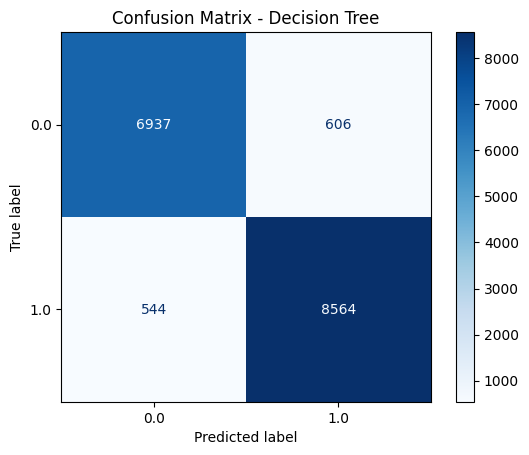

Training Random Forest...
Performance for Random Forest:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      7543
         1.0       0.96      0.95      0.95      9108

    accuracy                           0.95     16651
   macro avg       0.95      0.95      0.95     16651
weighted avg       0.95      0.95      0.95     16651



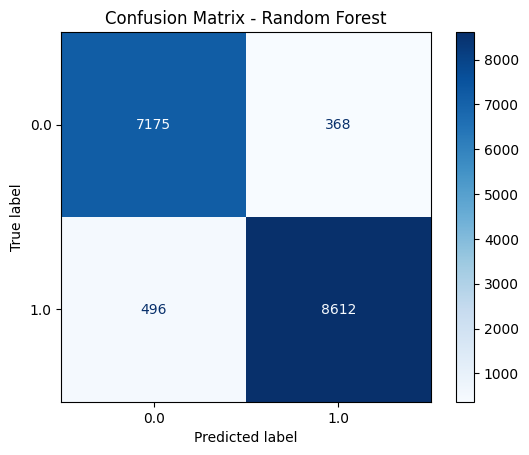

Training XGBoost...
Performance for XGBoost:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      7543
         1.0       0.96      0.95      0.96      9108

    accuracy                           0.95     16651
   macro avg       0.95      0.95      0.95     16651
weighted avg       0.95      0.95      0.95     16651



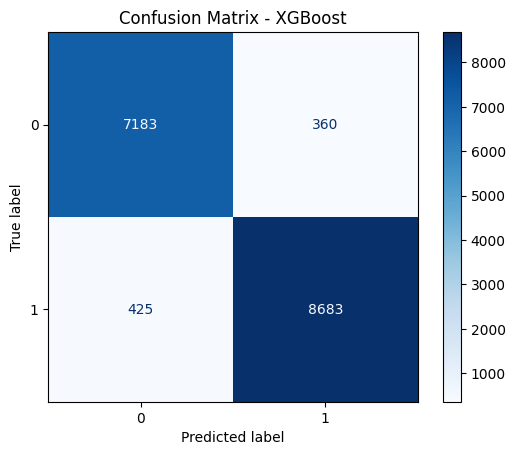


Performance Metrics for Oversampled Data:
                Precision    Recall  Accuracy  F1 Score
Decision Tree   0.930910  0.930935  0.930935  0.930910
Random Forest   0.948293  0.948111  0.948111  0.948146
XGBoost         0.952918  0.952856  0.952856  0.952872


In [53]:
# Step 1: Apply SMOTE to oversample the training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Step 2: Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Step 3: Train and evaluate each model
performance_metrics = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_oversampled, y_train_oversampled)
    preds = model.predict(X_val)

    # Evaluate performance
    print(f"Performance for {model_name}:")
    report = classification_report(y_val, preds, output_dict=True)
    performance_metrics[model_name] = {
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "Accuracy": model.score(X_val, y_val),
        "F1 Score": report["weighted avg"]["f1-score"]
    }
    print(classification_report(y_val, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# Step 4: Display performance metrics
performance_df_2 = pd.DataFrame(performance_metrics).T
print("\nPerformance Metrics for Oversampled Data:\n", performance_df_2)

# Step 5: Comment on results


# Hyperparameter tuning

## Random Search

In [55]:
from sklearn.metrics import make_scorer, f1_score

import time
start_time = time.time()

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}

# Use F1 score as the evaluation metric
scorer = make_scorer(f1_score, average='weighted')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,  # Ensure this is the GradientBoostingClassifier instance
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring=scorer,  # Metric to optimize
    cv=5,  # Cross-validation splits
    random_state=1,
    n_jobs=-1  # Use all available processors
)

# Fit the model
print("Tuning the model...")
xgb_model_tuned = random_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

print("Execution Time: {:.2f} minutes".format((time.time() - start_time) / 60))


Tuning the model...
Best Parameters: {'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 9, 'learning_rate': 0.1}
Execution Time: 5.18 minutes


In [57]:
xgb_model_tuned = XGBClassifier(
    subsample=1.0,
    n_estimators=500,
    min_samples_split=2,
    max_depth=9,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_model_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
# Evaluate on the test set
y_pred = xgb_model_tuned.predict(X_val)

# Check accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_val, y_pred))

Test Accuracy: 0.9538165875923368


## Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'subsample': [0.7, 1.0],  # Fraction of data used per tree
    'colsample_bytree': [0.7, 1.0],  # Fraction of features used per tree
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_xgb = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb.predict(X_val)

# Check accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_val, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Test Accuracy: 0.9538766440454027


In [17]:
xgb_model_tuned_2 = XGBClassifier(
    subsample=1.0,
    n_estimators=200,
    colsample_bytree= 0.7,
    max_depth=7,
    learning_rate=0.2,
    random_state=42
)

# Train the model
xgb_model_tuned_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
# Evaluate on the test set
y_pred = xgb_model_tuned_2.predict(X_val)

# Check accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_val, y_pred))

Test Accuracy: 0.9538766440454027


# Final Model Check with Test data and Comparision

In [63]:
travel_test = pd.read_csv("/content/Traveldata_test_(2).csv")
survey_test = pd.read_csv("/content/Surveydata_test_(2).csv")

print(travel_test.shape, survey_test.shape)

(35602, 9) (35602, 16)


In [64]:
df_test = pd.merge(travel_test, survey_test, on="ID", how="inner")
df_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,...,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [65]:
df_test.shape

(35602, 24)

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   CustomerType             32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   TypeTravel               32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   DepartureDelay_in_Mins   35573 non-null  float64
 8   ArrivalDelay_in_Mins     35479 non-null  float64
 9   Seat_comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_time_convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_location        35590 non-null  object 
 14  Onboardwifi_service   

In [67]:
df_test.isnull().sum()

,0
ID,0
Gender,30
CustomerType,3383
Age,11
TypeTravel,3448
Travel_Class,0
Travel_Distance,0
DepartureDelay_in_Mins,29
ArrivalDelay_in_Mins,123
Seat_comfort,22


In [69]:
import joblib
from sklearn.impute import SimpleImputer

# Example: Train an imputer
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Save imputers
joblib.dump(num_imputer, "num_imputer.pkl")
joblib.dump(cat_imputer, "cat_imputer.pkl")

print("✅ Imputers saved successfully!")


✅ Imputers saved successfully!


In [70]:
import os

# Check if the file exists before loading
if os.path.exists("num_imputer.pkl"):
    num_imputer = joblib.load("num_imputer.pkl")
    print("✅ num_imputer loaded successfully!")
else:
    print("❌ Error: 'num_imputer.pkl' not found! Please train and save it first.")


✅ num_imputer loaded successfully!


In [71]:
import os
print(os.listdir())  # Check all files in the directory


['.config', 'cat_imputer.pkl', 'Traveldata_train_(1)_(3).csv', 'Surveydata_train_(1)_(2)_(1).csv', 'num_imputer.pkl', 'Traveldata_test_(2).csv', 'Surveydata_test_(2).csv', 'sample_data']


In [75]:
import pandas as pd
import numpy as np
import joblib
from sklearn.impute import SimpleImputer


# Identify numerical and categorical columns
num_cols = df_test.select_dtypes(include=[np.number]).columns
cat_cols = df_test.select_dtypes(include=["object"]).columns

### 🔹 1️⃣ Load Pretrained Imputers & Transform Test Data
try:
    # Load fitted imputers
    num_imputer = joblib.load("num_imputer.pkl")
    cat_imputer = joblib.load("cat_imputer.pkl")

    # Apply imputers to test data
    df_test[num_cols] = num_imputer.transform(df_test[num_cols])
    df_test[cat_cols] = cat_imputer.transform(df_test[cat_cols])

    print("✅ Missing values handled successfully!")

except FileNotFoundError:
    print("❌ Error: Missing imputer files! Ensure 'num_imputer.pkl' and 'cat_imputer.pkl' exist.")
    exit()
except Exception as e:
    print(f"❌ Error during imputation: {e}")
    exit()

### 🔹 2️⃣ Apply One-Hot Encoding & Align Columns
try:
    # Load training feature names
    train_columns = joblib.load("train_feature_columns.pkl")

    # One-hot encode categorical variables
    df_test_encoded = pd.get_dummies(df_test)

    # Add missing columns (those in training but not in test)
    for col in train_columns:
        if col not in df_test_encoded.columns:
            df_test_encoded[col] = 0

    # Ensure correct column order
    df_test_encoded = df_test_encoded[train_columns]

    print("✅ One-hot encoding and column alignment completed!")

except FileNotFoundError:
    print("❌ Error: Missing 'train_feature_columns.pkl' file!")
    exit()
except Exception as e:
    print(f"❌ Error during encoding: {e}")
    exit()

### 🔹 3️⃣ Load XGBoost Model & Make Predictions
try:
    # Load trained XGBoost model
    xgb_model = joblib.load("xgb_model.pkl")

    # Predict on test data
    y_pred = (xgb_model.predict(df_test_encoded) > 0.5).astype(int)  # Convert probabilities to 0/1

    print("✅ Predictions made successfully!")

except FileNotFoundError:
    print("❌ Error: Missing 'xgb_model.pkl' file!")
    exit()
except Exception as e:
    print(f"❌ Error during prediction: {e}")
    exit()

### 🔹 4️⃣ Save Predictions to CSV
try:
    submission = pd.DataFrame({
        "ID": df_test["ID"],  # Ensure 'ID' column exists in df_test
        "Overall_Experience": y_pred
    })

    submission.to_csv("submission.csv", index=False)
    print("✅ Submission file 'submission.csv' saved successfully!")

except Exception as e:
    print(f"❌ Error while saving submission: {e}")
    exit()


❌ Error during imputation: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
❌ Error: Missing 'train_feature_columns.pkl' file!
❌ Error: Missing 'xgb_model.pkl' file!
❌ Error while saving submission: array length 16651 does not match index length 35602


In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

travel_test = pd.read_csv("/content/Traveldata_test_(2).csv")
survey_test = pd.read_csv("/content/Surveydata_test_(2).csv")
df_test = pd.merge(travel_test, survey_test, on="ID", how="inner")

# Identify numerical and categorical columns
num_cols = df_test.select_dtypes(include=[np.number]).columns
cat_cols = df_test.select_dtypes(include=["object"]).columns

### 🔹 1️⃣ Handle Missing Values
num_imputer = SimpleImputer(strategy="mean")  # Mean for numerical
cat_imputer = SimpleImputer(strategy="most_frequent")  # Most frequent for categorical

df_test[num_cols] = num_imputer.fit_transform(df_test[num_cols])
df_test[cat_cols] = cat_imputer.fit_transform(df_test[cat_cols])

print("✅ Missing values handled successfully!")

### 🔹 2️⃣ Label Encoding (One-Hot Encoding) & Align Columns
df_test_encoded = pd.get_dummies(
    df_test,
    columns = df_test.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first = True,
)

df_test_encoded = df_test_encoded.astype(float)

### 🔹 3️⃣ Make Predictions with XGBoost Model
y_pred = (xgb_model_tuned_2.predict(df_test_encoded) > 0.5).astype(int)  # Convert to 0/1

### 🔹 4️⃣ Accuracy Score (Only if true labels exist)
if "Overall_Experience" in df_test.columns:
    accuracy = accuracy_score(df_test["Overall_Experience"], y_pred)
    print(f"✅ Final Model Accuracy on Test Data: {accuracy:.4f}")

### 🔹 5️⃣ Save Predictions to CSV
submission = pd.DataFrame({
    "ID": df_test["ID"],
    "Overall_Experience": y_pred
})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file 'submission.csv' saved successfully!")


✅ Missing values handled successfully!


ValueError: feature_names mismatch: ['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Gender_Male', 'CustomerType_disloyal Customer', 'TypeTravel_Personal Travel', 'Travel_Class_Eco', 'Seat_comfort_excellent', 'Seat_comfort_extremely poor', 'Seat_comfort_good', 'Seat_comfort_need improvement', 'Seat_comfort_poor', 'Seat_Class_Ordinary', 'Arrival_time_convenient_excellent', 'Arrival_time_convenient_extremely poor', 'Arrival_time_convenient_good', 'Arrival_time_convenient_need improvement', 'Arrival_time_convenient_poor', 'Catering_excellent', 'Catering_extremely poor', 'Catering_good', 'Catering_need improvement', 'Catering_poor', 'Platform_location_Inconvinient', 'Platform_location_manageable', 'Platform_location_need improvement', 'Platform_location_very convinient', 'Platform_location_very inconvinient', 'Onboardwifi_service_excellent', 'Onboardwifi_service_extremely poor', 'Onboardwifi_service_good', 'Onboardwifi_service_need improvement', 'Onboardwifi_service_poor', 'Onboard_entertainment_excellent', 'Onboard_entertainment_extremely poor', 'Onboard_entertainment_good', 'Onboard_entertainment_need improvement', 'Onboard_entertainment_poor', 'Online_support_excellent', 'Online_support_good', 'Online_support_need improvement', 'Online_support_poor', 'Onlinebooking_Ease_excellent', 'Onlinebooking_Ease_extremely poor', 'Onlinebooking_Ease_good', 'Onlinebooking_Ease_need improvement', 'Onlinebooking_Ease_poor', 'Onboard_service_excellent', 'Onboard_service_extremely poor', 'Onboard_service_good', 'Onboard_service_need improvement', 'Onboard_service_poor', 'Leg_room_excellent', 'Leg_room_extremely poor', 'Leg_room_good', 'Leg_room_need improvement', 'Leg_room_poor', 'Baggage_handling_excellent', 'Baggage_handling_good', 'Baggage_handling_need improvement', 'Baggage_handling_poor', 'Checkin_service_excellent', 'Checkin_service_good', 'Checkin_service_need improvement', 'Checkin_service_poor', 'Cleanliness_excellent', 'Cleanliness_extremely poor', 'Cleanliness_good', 'Cleanliness_need improvement', 'Cleanliness_poor', 'Online_boarding_excellent', 'Online_boarding_extremely poor', 'Online_boarding_good', 'Online_boarding_need improvement', 'Online_boarding_poor'] ['ID', 'Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Gender_Male', 'CustomerType_disloyal Customer', 'TypeTravel_Personal Travel', 'Travel_Class_Eco', 'Seat_comfort_excellent', 'Seat_comfort_extremely poor', 'Seat_comfort_good', 'Seat_comfort_need improvement', 'Seat_comfort_poor', 'Seat_Class_Ordinary', 'Arrival_time_convenient_excellent', 'Arrival_time_convenient_extremely poor', 'Arrival_time_convenient_good', 'Arrival_time_convenient_need improvement', 'Arrival_time_convenient_poor', 'Catering_excellent', 'Catering_extremely poor', 'Catering_good', 'Catering_need improvement', 'Catering_poor', 'Platform_location_Inconvinient', 'Platform_location_manageable', 'Platform_location_need improvement', 'Platform_location_very convinient', 'Onboardwifi_service_excellent', 'Onboardwifi_service_extremely poor', 'Onboardwifi_service_good', 'Onboardwifi_service_need improvement', 'Onboardwifi_service_poor', 'Onboard_entertainment_excellent', 'Onboard_entertainment_extremely poor', 'Onboard_entertainment_good', 'Onboard_entertainment_need improvement', 'Onboard_entertainment_poor', 'Online_support_excellent', 'Online_support_good', 'Online_support_need improvement', 'Online_support_poor', 'Onlinebooking_Ease_excellent', 'Onlinebooking_Ease_extremely poor', 'Onlinebooking_Ease_good', 'Onlinebooking_Ease_need improvement', 'Onlinebooking_Ease_poor', 'Onboard_service_excellent', 'Onboard_service_good', 'Onboard_service_need improvement', 'Onboard_service_poor', 'Leg_room_excellent', 'Leg_room_extremely poor', 'Leg_room_good', 'Leg_room_need improvement', 'Leg_room_poor', 'Baggage_handling_excellent', 'Baggage_handling_good', 'Baggage_handling_need improvement', 'Baggage_handling_poor', 'Checkin_service_excellent', 'Checkin_service_good', 'Checkin_service_need improvement', 'Checkin_service_poor', 'Cleanliness_excellent', 'Cleanliness_good', 'Cleanliness_need improvement', 'Cleanliness_poor', 'Online_boarding_excellent', 'Online_boarding_extremely poor', 'Online_boarding_good', 'Online_boarding_need improvement', 'Online_boarding_poor']
expected Platform_location_very inconvinient, Cleanliness_extremely poor, Onboard_service_extremely poor in input data
training data did not have the following fields: ID

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load your dataset (df_dropped_nan is assumed to be preloaded)
df = df_dropped_nan.copy()  # Work with a copy to avoid modifying the original dataset
df_test_copy = df_test.copy()  # Copy test dataset

# ✅ 1️⃣ Identify Numerical & Categorical Columns
target_col = "Overall_Experience"

num_cols = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# ✅ 2️⃣ Handle Missing Values
num_imputer = SimpleImputer(strategy="mean")  # Mean for numerical
cat_imputer = SimpleImputer(strategy="most_frequent")  # Most frequent for categorical

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df_test_copy[num_cols] = num_imputer.transform(df_test_copy[num_cols])
df_test_copy[cat_cols] = cat_imputer.transform(df_test_copy[cat_cols])

print("✅ Missing values handled successfully!")

# ✅ 3️⃣ Label Encoding (Convert Categorical to Numeric)
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    if col in df_test_copy.columns:
        df_test_copy[col] = encoder.transform(df_test_copy[col])

print("✅ Categorical values encoded successfully!")

# ✅ 4️⃣ Train-Validation Split
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data split into training and validation sets!")

# ✅ 5️⃣ Ensure Test Set Columns Match Train Set
train_feature_columns = X_train.columns

df_test_encoded = df_test_copy.copy()

# Remove extra columns not in training data
extra_cols = [col for col in df_test_encoded.columns if col not in train_feature_columns]
if extra_cols:
    print(f"⚠ Dropping extra columns: {extra_cols}")
    df_test_encoded.drop(columns=extra_cols, inplace=True)

# Add missing columns with default value 0
missing_cols = [col for col in train_feature_columns if col not in df_test_encoded.columns]
for col in missing_cols:
    df_test_encoded[col] = 0

# Ensure correct column order
df_test_encoded = df_test_encoded[train_feature_columns]

print("✅ Train and test datasets now have the same features!")

# ✅ 6️⃣ Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
print("✅ XGBoost model trained successfully!")

# ✅ 7️⃣ Evaluate on Validation Data
y_val_pred = (xgb_model.predict(X_val) > 0.5).astype(int)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")

# ✅ 8️⃣ Make Predictions on Test Data
y_test_pred = (xgb_model.predict(df_test_encoded) > 0.5).astype(int)

# ✅ 9️⃣ Save Predictions to CSV
submission = pd.DataFrame({
    "ID": df_test["ID"],  # Keeping 'ID' for final submission
    "Overall_Experience": y_test_pred
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file 'submission.csv' saved successfully!")


✅ Missing values handled successfully!
✅ Categorical values encoded successfully!
✅ Data split into training and validation sets!
✅ Train and test datasets now have the same features!
✅ XGBoost model trained successfully!
✅ Validation Accuracy: 0.9519
✅ Submission file 'submission.csv' saved successfully!


In [32]:
sub = pd.read_csv("submission.csv")
sub.shape

(35602, 2)

In [33]:
df_test.shape

(35602, 24)

In [34]:
sub.head()

,ID,Overall_Experience
0,99900001.0,1
1,99900002.0,1
2,99900003.0,1
3,99900004.0,0
4,99900005.0,1


In [35]:
df_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001.0,Female,Loyal Customer,36.0,Business travel,Business,532.0,0.0,0.0,acceptable,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002.0,Female,disloyal Customer,21.0,Business travel,Business,1425.0,9.0,28.0,extremely poor,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003.0,Male,Loyal Customer,60.0,Business travel,Business,2832.0,0.0,0.0,excellent,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004.0,Female,Loyal Customer,29.0,Personal Travel,Eco,1352.0,0.0,0.0,acceptable,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005.0,Male,disloyal Customer,18.0,Business travel,Business,1610.0,17.0,0.0,excellent,...,excellent,excellent,excellent,excellent,good,acceptable,excellent,excellent,excellent,excellent


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import xgboost as xgb

# ✅ Load training and test datasets
df = df_dropped_nan.copy()  # Training dataset (ensure it's preloaded)
df_test_copy = df_test.copy()  # Test dataset

# ✅ Load Sample Submission File
sample_submission = pd.read_csv("/content/Sample_Submission_(2)_(2).csv")  # Load sample submission file

# ✅ Identify Numerical & Categorical Columns
target_col = "Overall_Experience"
num_cols = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# ✅ Handle Missing Values
num_imputer = SimpleImputer(strategy="mean")  # Mean for numerical
cat_imputer = SimpleImputer(strategy="most_frequent")  # Most frequent for categorical

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df_test_copy[num_cols] = num_imputer.transform(df_test_copy[num_cols])
df_test_copy[cat_cols] = cat_imputer.transform(df_test_copy[cat_cols])

print("✅ Missing values handled successfully!")

# ✅ Label Encoding for Categorical Features
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    if col in df_test_copy.columns:
        df_test_copy[col] = encoder.transform(df_test_copy[col])

print("✅ Categorical values encoded successfully!")

# ✅ Train-Validation Split
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data split into training and validation sets!")

# ✅ Ensure Test Set Has Same Features as Train Set
train_feature_columns = X_train.columns
df_test_encoded = df_test_copy.copy()

# Remove extra columns in test data
extra_cols = [col for col in df_test_encoded.columns if col not in train_feature_columns]
if extra_cols:
    print(f"⚠ Dropping extra columns: {extra_cols}")
    df_test_encoded.drop(columns=extra_cols, inplace=True)

# Add missing columns with default value 0
missing_cols = [col for col in train_feature_columns if col not in df_test_encoded.columns]
for col in missing_cols:
    df_test_encoded[col] = 0

# Ensure correct column order
df_test_encoded = df_test_encoded[train_feature_columns]

print("✅ Train and test datasets now have the same features!")

xgb_model_tuned_2 = XGBClassifier(
    subsample=1.0,
    n_estimators=200,
    colsample_bytree= 0.7,
    max_depth=7,
    learning_rate=0.2,
    random_state=42
)

# Train the model
xgb_model_tuned_2.fit(X_train, y_train)

# ✅ Evaluate on Validation Data
y_val_pred = (xgb_model.predict(X_val) > 0.5).astype(int)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")

# ✅ Make Predictions on Test Data
y_test_pred = (xgb_model.predict(df_test_encoded) > 0.5).astype(int)

# ✅ Ensure Submission File Has Correct IDs
submission = sample_submission.copy()  # Copy structure from sample submission
submission["Overall_Experience"] = y_test_pred  # Update predictions

# ✅ Save Final Submission File
submission.to_csv("submission.csv", index=False)
print("✅ Submission file 'submission.csv' saved successfully with correct IDs!")


✅ Missing values handled successfully!
✅ Categorical values encoded successfully!
✅ Data split into training and validation sets!
✅ Train and test datasets now have the same features!
✅ Validation Accuracy: 0.9519
✅ Submission file 'submission.csv' saved successfully with correct IDs!


In [37]:
sub = pd.read_csv("submission.csv")

In [38]:
sub.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
